##### Import statements

In [2]:
import pandas as pd
import zipfile
from utils import create_words_frequency, generate_word_cloud, create_tfidf, create_bow

##### Load input dataset

In [3]:
with zipfile.ZipFile( "data/input/cnbc-news.zip", "r") as zip_ref:
    zip_ref.extractall( "data/input")

In [4]:
df = pd.read_csv(
	"data/input/cnbc-news.csv",
	sep=";",
	parse_dates=[ "published_date"]
)

In [5]:
df.head( 5)

,published_date,title,description,tags,keyPoints
0,2018-01-01 10:04:04,One year on: Is Finland’s free money experimen...,"One year ago, Finland started giving out free ...","Europe News,Jobs,World Markets",NaN
1,2018-01-01 10:06:27,Marketing strategies from the world’s top CEOs...,From listening into customer care calls to sta...,"Marketing,SAP AG,Soho China Ltd,Unilever PLC,M...",NaN
2,2018-01-01 10:12:31,"Compass Group chief, five others dead in Sydne...",The CEO of Compass Group Plc and four of his c...,Business,Compass Group CEO Cousins among those dead in ...
3,2018-01-01 11:02:49,New year brings broad pot legalization to Cali...,The arrival of the new year in California brou...,"United States,California",The nation's most populous state joins a growi...
4,2018-01-01 11:08:14,Saudi Arabia hikes gasoline prices,Saudi Arabia was set to raise local gasoline p...,NaN,NaN


In [6]:
df.describe()

,published_date
count,182204
mean,2020-11-01 08:17:30.872340736
min,2018-01-01 10:04:04
25%,2019-04-09 18:01:35.500000
50%,2020-09-03 03:44:54.500000
75%,2022-05-09 16:55:02.249999872
max,2024-03-14 19:53:47


##### Identifying missing date

In [7]:
df[ df[ "published_date"].isnull()]

,published_date,title,description,tags,keyPoints


##### Drop rows with missing date

In [8]:
df = df.dropna( subset=[ "published_date"])

##### Identifying duplicate rows

In [9]:
df[ df.duplicated()]

,published_date,title,description,tags,keyPoints
40244,2019-02-11 21:56:46,Amazon is acquiring home Wi-Fi start-up Eero,Amazon is entering the business for home route...,"Cisco Systems Inc,NETGEAR Inc,Alphabet Inc,App...",Eero competes with Google and others in the ho...
47176,2019-04-27 10:00:51,Even some Wharton business school students cou...,The student-run Wharton Common Cents club aims...,"Millennials,University of Pennsylvania,Higher ...",NaN
55769,2019-08-07 23:24:04,Jeffrey Epstein 'misappropriated vast sums of ...,L Brands founder Les Wexner says he learned th...,"Human trafficking,Sex scandals,Philanthropy,Fl...",Les Wexner says Jeffrey Epstein misappropriate...
61564,2019-10-15 05:00:00,The 11 best travel credit cards of March 2024,We analyzed dozens of popular travel cards usi...,"Select: Credit Cards,Select_Cards,Select_Monet...",NaN
61565,2019-10-15 05:00:00,11 best balance transfer cards with 0% APR of ...,We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",NaN
...,...,...,...,...,...
181754,2024-03-07 18:30:01,The average credit score has dropped for the f...,The average FICO credit score has declined for...,"Select: Credit Monitoring,Select: Credit Cards...",NaN
181755,2024-03-07 18:30:01,The average credit score has dropped for the f...,The average FICO credit score has declined for...,"Select: Credit Monitoring,Select: Credit Cards...",NaN
181756,2024-03-07 18:30:01,The average credit score has dropped for the f...,The average FICO credit score has declined for...,"Select: Credit Monitoring,Select: Credit Cards...",NaN
181829,2024-03-08 14:53:53,How much down payment do you need to buy a house?,The conventional wisdom that you need to put 2...,"Home sales,Mortgage financing,Select_Monetized...",NaN


##### Drop duplicate rows

In [10]:
df = df.drop_duplicates()

##### Identifying missing fields

In [11]:
df[ df.isnull().any( axis=1)]

,published_date,title,description,tags,keyPoints
0,2018-01-01 10:04:04,One year on: Is Finland’s free money experimen...,"One year ago, Finland started giving out free ...","Europe News,Jobs,World Markets",NaN
1,2018-01-01 10:06:27,Marketing strategies from the world’s top CEOs...,From listening into customer care calls to sta...,"Marketing,SAP AG,Soho China Ltd,Unilever PLC,M...",NaN
4,2018-01-01 11:08:14,Saudi Arabia hikes gasoline prices,Saudi Arabia was set to raise local gasoline p...,NaN,NaN
7,2018-01-01 13:00:00,7 simple money habits that will help you build...,Kick off 2018 by establishing these smart rout...,Entrepreneurship,NaN
8,2018-01-01 13:46:07,Here are three key global themes set to domina...,"The next calendar year is projected to be a ""n...","Emmanuel Macron,Donald Trump,UBS Group AG,EU,A...",NaN
...,...,...,...,...,...
182194,2024-03-14 12:00:01,The best USAA credit cards of March 2024,USAA offers a variety of credit cards includin...,"CNBC Select Lists,Select: Credit Cards,Select_...",NaN
182197,2024-03-14 12:22:25,Here are Thursday's biggest analyst calls: Nvi...,Here are Thursday's biggest calls on Wall Street.,"Oracle Corp,Broadcom Inc,NVIDIA Corp,Neuropace...",NaN
182198,2024-03-14 12:30:42,Stocks making the biggest moves premarket: Cit...,These are the stocks posting the largest moves...,"regwall-marketmovers,Microstrategy Inc,DICK'S ...",NaN
182202,2024-03-14 13:30:01,Amazon's Big Spring Sale is coming up — here's...,Amazon Prime members can take advantage of exc...,"Select_News,Select_Cards,Select_Advice,Select_...",NaN


##### Filling missing fields

In [12]:
df = df.fillna( "")

##### Create unified text of title, description, tags and keyPoints *by concatenating them*

In [13]:
df[ "text"] = df[ "title"] + ", " + df[ "description"] + ", " + df[ "tags"] + df[ "keyPoints"]

##### Textual Features

In [14]:
features_tfidf, tfidf_vec = create_tfidf( df, feature_column="text", max_feature_size=5000)

In [15]:
features_tfidf_names = tfidf_vec.get_feature_names_out()

features_tfidf_names

array(['3m', '5g', 'ab', ..., 'zoom video', 'zoom video communications',
       'zuckerberg'], dtype=object)

In [16]:
tfidf_sorted_table = create_words_frequency( features_tfidf, features_tfidf_names)

tfidf_sorted_table.head( 20)

,Top Words,Counts
0,markets,4645.361351
1,news,3555.980233
2,investment,3212.540632
3,stock,3178.552776
4,business,3137.875276
5,breaking,3092.281042
6,breaking news,3053.106418
7,strategy,3025.853669
8,said,2998.585716
9,investment strategy,2929.472409


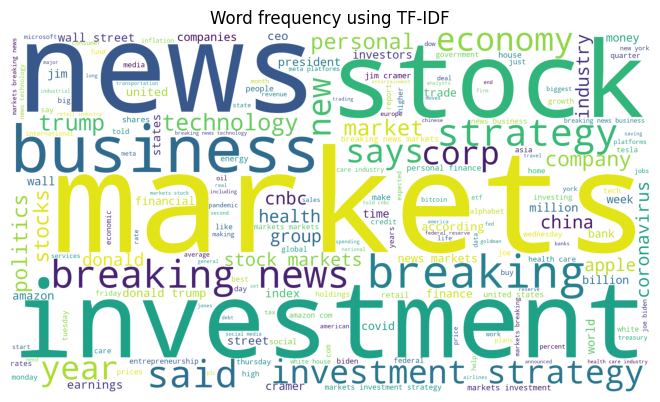

In [17]:
generate_word_cloud( tfidf_sorted_table, "Word frequency using TF-IDF")

In [18]:
features_bow, bow_vec = create_bow( df, feature_column="text", max_feature_size=5000)

In [19]:
features_bow_names = bow_vec.get_feature_names_out()

features_bow_names

array(['3m', '5g', 'ab', ..., 'zoom video', 'zoom video communications',
       'zuckerberg'], dtype=object)

In [20]:
bow_sorted_table = create_words_frequency( features_bow, features_bow_names)

bow_sorted_table.head( 20)

,Top Words,Counts
0,markets,117254
1,news,85777
2,breaking,68938
3,breaking news,67637
4,business,66850
5,said,64267
6,trump,61327
7,corp,59900
8,stock,58787
9,investment,57295


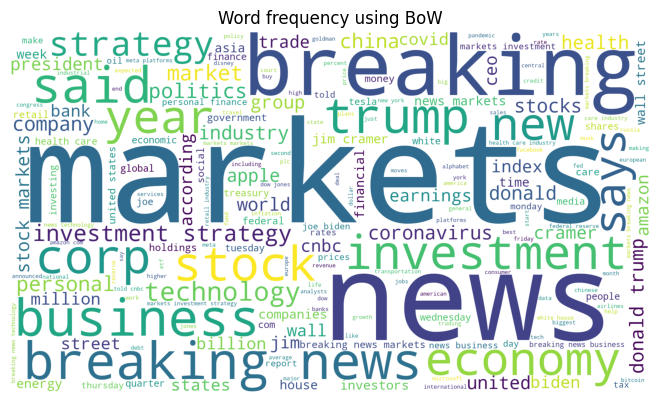

In [21]:
generate_word_cloud( bow_sorted_table, "Word frequency using BoW")

##### Creating new dataframe with clean data

In [22]:
new_df = df[ [ "published_date", "text"]]

new_df = new_df.sort_values( "published_date")

new_df.head( 5)

,published_date,text
0,2018-01-01 10:04:04,One year on: Is Finland’s free money experimen...
1,2018-01-01 10:06:27,Marketing strategies from the world’s top CEOs...
2,2018-01-01 10:12:31,"Compass Group chief, five others dead in Sydne..."
3,2018-01-01 11:02:49,New year brings broad pot legalization to Cali...
4,2018-01-01 11:08:14,"Saudi Arabia hikes gasoline prices, Saudi Arab..."


In [23]:
new_df.to_csv( "data/result/cnbc-data.csv", sep=";", index=False)